In [1]:
import os
from openai import OpenAI
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Optional, Tuple, Union
# 只能提取文本信息
import PyPDF2
import markdown
import html2text
import json
from tqdm import tqdm
import tiktoken
import re
from bs4 import BeautifulSoup
from IPython.display import display, Code, Markdown


In [2]:
api_key = "EMPTY"
base_url = "http://localhost:6006/v1"
# 也可以设置临时环境变量
os.environ["OPENAI_API_KEY"] = api_key
os.environ["OPENAI_BASE_URL"] = base_url

# embedding_model = "text-embedding-3-small"
embedding_model = "Qwen3-Embedding-8B"

In [3]:
# 实例化客户端
client = OpenAI(api_key=api_key, base_url=base_url)

In [4]:
input_text = "测试文本"
# 调用embedding api获取文本的向量表示
response = client.embeddings.create(
    input = input_text,
    model = embedding_model
)
text_embed = response.data[0].embedding

In [5]:
# print(text_embed)
print(len(text_embed))

4096


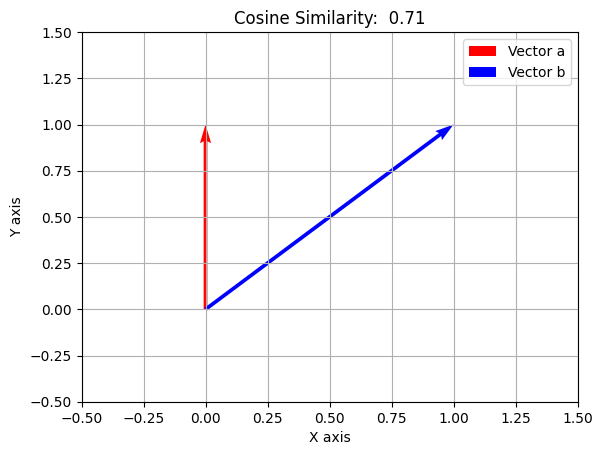

In [8]:
a = np.array([0, 1], dtype=np.float32)
b = np.array([1, 1], dtype=np.float32)

cos_sim = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# 绘制向量
plt.quiver(0, 0, a[0], a[1], angles="xy", scale_units="xy", scale=1, color="r")
plt.quiver(0, 0, b[0], b[1], angles="xy", scale_units="xy", scale=1, color="b")

# 设置图表属性
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.title(f"Cosine Similarity: {cos_sim: .2f}")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Vector a", "Vector b"])
plt.show()



In [ ]:
def cosine_similarity(x: np.ndarray, y: np.ndarray):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
text1 = "我喜欢吃苹果"
text2 = "苹果是我最喜欢吃的水果"
text3 = "我喜欢用苹果手机"

# 将文档片段转换为向量
response = client.embeddings.create(
    input = [text1, text2, text3],
    model = embedding_model
)


In [7]:
class BaseEmbedding:
    def __init__(self, path: str, is_api: bool) -> None:
        self.path = path
        self.is_api = is_api

    def get_embedding(self, text: str, model: str) -> List[float]:
        raise NotImplementedError

    @classmethod
    def cosine_similarity(cls, vector1: List[float], vector2: List[float]) -> float:
        dot_product = np.dot(vector1, vector2)
        magnitude = np.linalg.norm(vector1) * np.linalg.norm(vector2)
        if magnitude == 0:
            return 0
        return dot_product / magnitude


In [8]:
class OpenAIEmbedding(BaseEmbedding):
    def __init__(self, path: str = None, is_api: bool = True) -> None:
        super().__init__(path, is_api)
        if self.is_api:
            self.client = OpenAI()
            self.api_key = os.environ["OPENAI_API_KEY"]
            self.base_url = os.environ["OPENAI_BASE_URL"]

    def get_embedding(self, text: str, model: str = "Qwen3-Embedding-8B") -> List[float]:
        if self.is_api:
            return self.client.embeddings.create(input=text, model=model).data[0].embedding
        else:
            raise NotImplementedError

In [10]:
embedding_model = OpenAIEmbedding()
text1 = "今天天气晴朗！"
text2 = "今天天气真不错！"
vector1 = embedding_model.get_embedding(text1)
vector2 = embedding_model.get_embedding(text2)
cos_sim = embedding_model.cosine_similarity(vector1, vector2)
print(f"文本相似度：{cos_sim:.2f}")

文本相似度：0.93


In [15]:
encoder = tiktoken.get_encoding("cl100k_base")
encoded_text1 = encoder.encode(text1)
print(encoded_text1)
decoded_text1 = encoder.decode(encoded_text1)
print(decoded_text1)

[37271, 36827, 36827, 30320, 242, 45114, 112, 4916, 245, 6447]
今天天气晴朗！
